# Neural Network from scratch in numpy

# First some theory

First some basic calculus:

$$
f(X) = A \cdot X
$$

$$
g(X) = X \cdot A
$$

$$
\frac{df}{dX} = A
$$

$$
\frac{dg}{dX} = A^T
$$

Let's start with a simple NN:

**Forward Propagation**

$$ Z = W \cdot X + b$$
$$ \hat{Y} = SoftMax(Z)$$

where 
$$
SoftMax(Z)_i = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}}
$$

**Shapes**

- $X \in \R^{784}$ is a single digit, i.e. a single instance,
- $W \in \R^{10 \times 784}$ is the matrix of weights,
- $b \in \R^{10}$ is the vector of biases,
- $Z \in \R^{10}$ is the output of the layer,
- $\hat{Y} \in \R^{10}$ is our prediction

Now, the true vector of values $Y$ is a one hot encoding vector with $1$ in the right label, and $0$ in the other places:

$$ 
Y_i = \begin{bmatrix}
           0 \\
           0 \\
           \vdots \\
           0 \\
           1
    \end{bmatrix}
$$

this means that $X_i$ is actually a "9".

** Loss function **

What loss function is better to use in this scenario? One simple possibility would be to use the $MSE(Y, \hat{Y})$, but in this scenario we have a better option:

$$
L(Y, \hat{Y}) = - \sum y_i \text{log}(\hat{y}_i)
$$

why is this a good choice? Because the vector of labels $Y$ is a one-hot-encoding vector, that means that all the values are $0$ expect one that is $1$. Using MSE is not the best option here, we should instead focus on the only component that is not $0$.

In this way, summing all the components of $Y$ the only one that survives is the one with the $1$ and its corresponding value in $\hat{Y}$.

And what about $\text{log}(\hat{y}_i)$?

Ideally $\hat{y}_i$ should be close to $1$ (and all the other components equal to $0$), and if $\hat{y}_i \approx 1$ then $\text{log}(\hat{y}_i) \approx 0$, if instead $\hat{y}_i \approx 0$, then $\text{log}(\hat{y}_i) \approx -\infty$ and $L(Y, \hat{Y}) \approx + \infty$, and it is what we want for a loss function, close to 0 when the prediction is correct and very big when it is wrong.

Another reason why it's a good choice is the derivative that exits from it, i.e.:

$$
\frac{\partial L}{\partial Z} = \hat{Y} - Y
$$

if you want to find out why check this article: https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba

but what we really want is to calculate the 

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial W}
$$

Which is easily calculated noting that

$$
\frac{\partial L}{\partial Z} = \hat{Y}-Y
$$
$$
\frac{\partial Z}{\partial W} = X^T
$$

and therefore

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial W} = (\hat{Y}-Y) \cdot X^T
$$

does the shapes match? Well, $\frac{\partial L}{\partial W}$ must be the same shape of $W$ which is $\R^{10 \times 784}$, and what we have is that

* $(\hat{Y}-Y) \in \R^{10}$
* $X \in \R^{784} \implies W^T \in \R^{1 \times 784}$

This imply that

* $(\hat{Y}-Y)\cdot X^T \in \R^{10 \times 784}$ which is exactly what we want

Now, what about $b$?

We still have that 

$$
\frac{\partial L}{\partial Z} = \hat{Y}-Y
$$
but...
$$
\frac{\partial Z}{\partial b} = I \in \R^{1 \times 1}
$$

and therefore 

$$
\frac{\partial L}{\partial b} = (\hat{Y}-Y) \cdot I \in \R^{10 \times 1}
$$

So putting all together we have+

**Forward propagation**

$$ Z = W \cdot X + b $$
$$ \hat{Y} = \text{SoftMax}(Z) $$

**Backward propagation**

$$ dZ = (\hat{Y}-Y) \in \R^{10 \times 1} $$
$$ dW = (\hat{Y}-Y) \cdot X^T \in \R^{10 \times 784} $$
$$ db = (\hat{Y}-Y) \cdot I \in \R^{10 \times 1} $$

**Parameters update**

$$ W^{(n+1)} = W^{(n)} - \alpha \cdot dW^{(n)} $$
$$ b^{(n+1)} = b^{(n)} - \alpha \cdot db^{(n)} $$


# Generalizing to $n$ observations

The formula provided above are for a single observations, i.e. $X \in \R^{784}$ is a single digit, a single image, a single observation. 
What we will have in reality is all the dataset i.e. $ \mathbb{X} \in \R^{784 \times n}$ where $n$ is the number of observations in my dataset and similarly I will have $\mathbb{Y} \in \R^{10 \times n}$. 

What we will have is:

* Each column of $\mathbb{X}$ is a single observation $X_i \in \R^{784}$
* Each column of $\mathbb{Y}$ is a single prediction $Y_i \in \R^{10}$

What we should do when we have $n$ observations?

Well let's think about what could be a good strategy:

When we had a single observation, lets call it $X_1$ in the end what we end up was 

$$
dW_1 = (\hat{Y}_1 - Y_1) \cdot X_1^T 
$$

which is the "adjustments" that we must do on $W$ because of the prediction $\hat{Y}_1$ from $X_1$. 
If we had another observation, $X_2$ the adjustment would be

$$
dW_2 = (\hat{Y}_2 - Y_2) \cdot X_2^T 
$$

and what would be a good idea to merge these two "adjustments"? A simple idea would be to do the average, i.e. to sum and average the two weights "adjustments" $W_1$ and $W_2$:

$$
dW = \frac{1}{2} \cdot (W_1 + W_2)
$$

and this is exactly what will do considering the generalized version:

**Shapes**

$$ \mathbb{X} \in \R^{784 \times n} $$
$$ \hat{\mathbb{Y}} \in \R^{10 \times n}$$

**Forward propagation**

$$ \mathbb{Z} = W \cdot \mathbb{X} + b $$
$$ \hat{\mathbb{Y}} = \text{SoftMax}(\mathbb{Z}) $$

**Backward propagation**

$$ d\mathbb{Z} = (\hat{\mathbb{Y}}-\mathbb{Y}) \in \R^{10 \times n} $$
$$ dW = 1/n \ (\hat{\mathbb{Y}}-\mathbb{Y}) \cdot \mathbb{X}^T \in \R^{10 \times 784} $$

which considering that

$$
(\hat{\mathbb{Y}}-\mathbb{Y}) = [\hat{Y}_1 - Y_1 | \hat{Y}_2 - Y_2 | \dots | \hat{Y}_n - Y_n]
$$
$$
\mathbb{X} = [X_1 | X_2 | \dots | X_n]
$$

doing 

$$
\frac{1}{n} \cdot (\hat{\mathbb{Y}}- \mathbb{Y}) \cdot \mathbb{X}^T = \frac{1}{n} \cdot ((\hat{Y}_1 - Y_1)\cdot X_1^T + \dots + (\hat{Y}_n - Y_n)\cdot X_n^T) = \frac{1}{n} \cdot (dW_1 + \dots + dW_n)
$$
which is exactly doing the average of all the "adjustments" of all the various predictions $\hat{Y}_1, \dots, \hat{Y}_n $

Also for $b$ the parameter update for a single observation is simply $\hat{Y}-Y$ where in this case is $\in \R^{10}$, but what if $(\hat{\mathbb{Y}}-\mathbb{Y}) \in \R^{10 \times n}$? Well in this case the better idea would be to do an average since each column here represents one observation, we averege over all the $m$ observations:

$$
db = 1/m \ \Sigma dZ
$$



# Intuition behind parameters update

Focus for a moment on the case where $X \in \R^{784}$ is a single observation and therefore $\hat{Y} \in \R^{10}$ is a single prediction, we have that
$$
\frac{\partial L}{\partial Z} = \hat{Y}-Y
$$
$$
\frac{\partial Z}{\partial W} = X^T
$$

and therefore

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial W} = (\hat{Y}-Y) \cdot X^T
$$

what does tell $\hat{Y}-Y$? 

Since 

$$
dZ = \hat{Y}-Y
$$

suppose to have 


$$ 
Y_i = \begin{bmatrix}
           0 \\
           \vdots \\
           0 \\
           1
    \end{bmatrix}
$$

and 


$$ 
\hat{Y}_i = \begin{bmatrix}
           1 \\
           0 \\
           \vdots \\
           0 \\
    \end{bmatrix}
$$

then 


$$ 
dZ = \hat{Y}_i - Y_i = \begin{bmatrix}
           1 \\
           0 \\
           \vdots \\
           0 \\
           -1
    \end{bmatrix}
$$

what does tell to the model? 

$$
Z = Z - dZ = Z - \begin{bmatrix}
           1 \\
           0 \\
           \vdots \\
           0 \\
           -1
    \end{bmatrix} = Z + \begin{bmatrix}
           -1 \\
           0 \\
           \vdots \\
           0 \\
           +1
    \end{bmatrix}
$$

which is basically saying, "Hey man, increase the value of the last value of $Z$", and since the $SoftMax$ is a monotone increasing funcion of $Z$, this means 
* increase the probability that $X$ being predicted as a "9"!
* decrease the probability that $X$ being predicted as a "0"!

But since 

$$
Z = W \cdot X + b
$$

how we should adjust $W$ in order to improve $L$? Well we just saw how to adjust $Z$ in order to improve $L$, let's see how to adjust $Z$ as a function of $W$ and we will have how to adjust $W$ in order to improve $L$. 
These thing that I have just written in a terrible english is basically the chain rule:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial W}
$$

And in formula in the end is equal to:

$$
\frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial W} = (\hat{Y}-Y) \cdot X^T
$$

which, if we call $(\hat{Y}-Y) = \delta$ and consider 

$$
X = \begin{bmatrix}
           x_1 \\
           x_2 \\
           \vdots \\
           x_{784} \\
    \end{bmatrix}
$$

we obtain that 

$$
dW = \frac{\partial L}{\partial W} = (\hat{Y}-Y) \cdot X^T = [\delta \cdot x_1 | \dots | \delta \cdot x_{784}] = 
\begin{bmatrix}
           x_1, 0, \dots, 0, x_{784} \\
           0, 0, \dots, 0, 0 \\
           \vdots \\
           0, 0, \dots, 0, 0 \\
           -x_1, 0, \dots, 0, -x_{784} \\
    \end{bmatrix}
$$

which is basically saying to $W$:

$$
W = W - dW
$$

"*Reduce the first row, which is responsible to the probability of the "0", and increase the last row, which is responsible for the probability of the "9"*."

The intuition behind $b$ parameter update instead is quite simple, since $b$ only affect by summing on $W \cdot X$, you simply add/remove the $\delta$ of the last prediction: $\hat{Y} - Y$.

# Move on to the first layer

Ok, so far we have played a little bit, in the sense that this layer is quite simple, lets complicate things a little bit by adding an initial layer with a well know activation function in NN, i.e. the $ReLu$ function:

$$
Relu(Z)_i = max(0, z_i)
$$

We obtain for the **Forward Propagation**:

$$
Z^1 = W^1 \cdot X + b^1
$$

$$
A^1 = ReLu(Z^1)
$$

$$
Z^2 = W^2 \cdot A^1 + b^2
$$

$$
\hat{Y} = A^2 = Softmax(Z^2)
$$

and since the loss function is always the same, i.e. the **cross entropy loss**:

$$
L(\hat{Y}, Y) = -\sum y_i \cdot log(\hat{y}_i)
$$

we have for the **Backward Propagation**:

$$
dZ^2 = (A^2 - Y)
$$

$$
dW^2 = 1/m \ dZ^2 \cdot (A^{1})^T
$$

$$
db^2 = 1/m \ \Sigma dZ^2
$$

Now we need to calculate

$$
dZ^1 = ... ? 
$$

$$
dW^1 = ... ? 
$$ 

$$
db^1 = ... ?
$$

Suppose to have $dZ^1$, then the other two would be simply:

$$
dW^1 = \frac{d L}{d W^1} = \frac{d L}{d Z^1} \cdot \frac{d Z^1}{ dW^1} = 1/m \ dZ^1 \cdot X^T
$$

$$
db^1 = 1/m \ \Sigma dZ^1
$$

ok now the last part is to compute $dZ^1$

$$
d Z^1 = \frac{d L}{d Z^1} = \frac{d L}{d A^1} \cdot \frac{d A^1}{d Z^1}
$$

where we have that

$$
\frac{d L}{d A^1} = g'_{ReLu}(Z^1)
$$

which we have that is simply the derivative of the $ReLu$ function, i.e.

$$
g'_{ReLu}(Z^1) = \begin{cases} 
    0 & \text{if } Z^1 < 0 \\
    1 & \text{if } Z^1 \geq 0 
\end{cases}
$$

last we have $\frac{d L}{d A^1}$ which is simply the derivative of the loss function with respect to the activation of the previous layer, i.e.

$$
\frac{d L}{d A^1} = \frac{d L}{d Z^2} \cdot \frac{d Z^2}{d A^1}
$$

and we have that

$$
\frac{d Z^2}{d A^1} = {dW^2}^T
$$

and finally we have that

$$
d Z^1 = g'_{ReLu}(Z^1) \cdot dZ^2 \cdot {W^2}^T
$$








# Now (finally) we can implement the whole thing

In [46]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv("data/train.csv")

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Label:  5


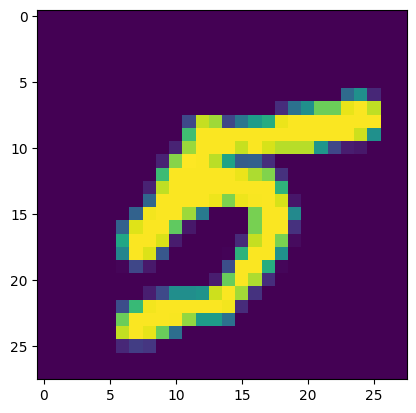

In [47]:
import matplotlib.pyplot as plt

idx = 300
g = plt.imshow(X_train[:, idx].reshape(28,28)) 
print("Label: ", Y_train[idx])

# Model

**Data**

* $\mathbb{X} \in \R^{m \times n}$ where $ m = 784$ and $n = 41000$, is our dataset where each column is a digit (aka an observation)
* $Y \in \R^n$, the labels


**Forward Propagation**

$$ Z^{[1]} = W^{[1]}\cdot \mathbb{X} + b^{[1]}$$
$$ A^{[1]} = ReLu(Z^{[1]}) $$
$$ Z^{[2]} = W^{[2]}\cdot A^{[1]} + b^{[2]} $$
$$ A^{[2]} = SoftMax(Z^{[2]}) $$

**Backward Propagation**

$$ dZ^{[2]} = A^{[2]} - Y $$
$$ dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T} $$
$$ db^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}} $$
$$ dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]}) $$
$$ dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T} $$
$$ db^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}} $$


**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1


# Define some functions

In [34]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(x):
    return np.maximum(x, 0)

def SoftMax(x):
    x = np.exp(x) / sum(np.exp(x))
    return x

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2

def ReLu_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLu_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [35]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [38]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
            print("-"*20)
    return W1, b1, W2, b2

In [39]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
Accuracy:  0.15692682926829268
--------------------
Iteration:  10
Accuracy:  0.2906829268292683
--------------------
Iteration:  20
Accuracy:  0.4017804878048781
--------------------
Iteration:  30
Accuracy:  0.45814634146341465
--------------------
Iteration:  40
Accuracy:  0.5018292682926829
--------------------
Iteration:  50
Accuracy:  0.5400243902439025
--------------------
Iteration:  60
Accuracy:  0.5720731707317073
--------------------
Iteration:  70
Accuracy:  0.6002195121951219
--------------------
Iteration:  80
Accuracy:  0.623390243902439
--------------------
Iteration:  90
Accuracy:  0.6419756097560976
--------------------
Iteration:  100
Accuracy:  0.6594878048780488
--------------------
Iteration:  110
Accuracy:  0.673829268292683
--------------------
Iteration:  120
Accuracy:  0.6866585365853659
--------------------
Iteration:  130
Accuracy:  0.6984146341463414
--------------------
Iteration:  140
Accuracy:  0.7089024390243902
--------------------
Iterat

# Make predictions


In [40]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [43]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy on Test set: ", get_accuracy(dev_predictions, Y_dev))

Accuracy on Test set:  0.845
